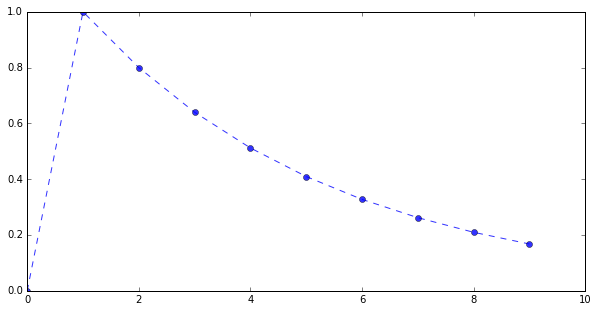

In [1]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
 
# N: number of periods for the transition

# std: st.d of innovation

N = 10
std = 1.0
phi_1 = 0.8
phi_2 = 0
theta = 0

A = np.array(([phi_1,phi_2,theta],[1,0,0],[0,0,0]))    
 
C = np.array([1,0,1]) 
 
G = np.array([1,0,0]) 
    
# == set up the simulation == #

Simul_shock = np.zeros(N)
Simul_shock[0]=std

#Simul_shock = np.random.normal(0, std, N)
Simul_x = np.zeros((N+1,3))
Simul_x[0,:]=np.array([0,0,0])
Simul_y = np.zeros(N)

for i in range(0,N):    
    Simul_x[i+1,:] = np.dot(A, Simul_x[i,:])+np.dot(C, Simul_shock[i]) 
    Simul_y[i] = np.dot(G, Simul_x[i,:])  
        
# Plot the simulation
 
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, N) 
ax.plot(Simul_y, 'bo--',  alpha=0.8) 
plt.show()    

In [3]:
Simul_x

array([[ 0.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  1.        ],
       [ 0.8       ,  1.        ,  0.        ],
       [ 0.64      ,  0.8       ,  0.        ],
       [ 0.512     ,  0.64      ,  0.        ],
       [ 0.4096    ,  0.512     ,  0.        ],
       [ 0.32768   ,  0.4096    ,  0.        ],
       [ 0.262144  ,  0.32768   ,  0.        ],
       [ 0.2097152 ,  0.262144  ,  0.        ],
       [ 0.16777216,  0.2097152 ,  0.        ],
       [ 0.13421773,  0.16777216,  0.        ]])

In [4]:
Simul_y

array([ 0.        ,  1.        ,  0.8       ,  0.64      ,  0.512     ,
        0.4096    ,  0.32768   ,  0.262144  ,  0.2097152 ,  0.16777216])

In [5]:
Simul_shock

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [ ]:
#Simul_x is a matrix of N+1 x 3, where 3 is the number of elements in the state vector. 
#Thus for an ARMA(2,1) process, there are 3 state variables to keep track of in the state vector.
#xt = [y_t, y_t-1, w_t]
#So each row of the Simul_x matrix corresponds with each state vector for each time period
#Simul_x = [x_0,
#           x_1,
#           x_2,
#           ...,
#           x_N]

#Simul_y is a vector of length N containing [y_0, y_1, ... , y_N-1]

#Simul_shock is the "shock" vector, w_t
#The reason why Simul_shock[0]=std is because the Simul_shock vector is of length N, and thus is indexed
#beginning at time t=1. Thus the 0th index of Simul_shock actually corresponds to the time t=1.